# P2.7 - prezentacja rozwiązania
Autor: Sławomir Górawski

In [2]:
# This cell disables auto-scrolling,
# which was an issue with more than one plot

macro javascript_str(s)
    display("text/javascript", s)
end

javascript"""
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }
"""

In [3]:
using Polynomials.polyval
using PyPlot

include("program.jl");

## Testy

In [4]:
function get_equidistant_nodes(x_start, x_end, nodes_number)
    linspace(x_start, x_end, nodes_number)
end


function get_chebyshev_nodes(x_start, x_end, nodes_number)
    (([cos(pi * (2*k + 1) / (2*nodes_number)) for k = nodes_number-1:-1:0]
      + 1)
      * (x_end - x_start) / 2
      + x_start)
end


function get_random_nodes(x_start, x_end, nodes_number)
    @assert nodes_number >= 2
    vcat([x_start],
         sort(rand(nodes_number - 2)) * (x_end - x_start) + x_start,
         [x_end])
end;

In [9]:
# helper function to avoid code duplication
# creates lines found on both methods' subplots
function create_initial_params_subplot(f, c, nodes, x_0, ϵ)
    X = linspace(nodes[1], nodes[end], 1000)
    scatter(nodes, map(f, nodes), linewidth=1, color="k", marker="+", label="nodes")
    plot(X, map(f, X), linewidth=0.5, color="k", label="function f")
    axhline(c, linewidth=0.5, color="c", label="constant c")
    axvline(x_0, linewidth=0.5, color="g", label="result x")
    
    xlabel("x = $x_0\nϵ = $ϵ")
end


function create_newton_subplot(f, c, nodes, x_0, ϵ)
    create_initial_params_subplot(f, c, nodes, x_0, ϵ)
    f_values = map(f, nodes)
    inter_poly = interpolate(nodes, f_values)
    inter_X = linspace(nodes[1], nodes[end], 1000)
    inter_Y = map(x -> polyval(inter_poly, x), inter_X)
    plot(inter_X, inter_Y, linewidth=1, color="r", label="interpolation")
end


function create_inverse_interpolation_subplot(f, c, nodes, x_0, ϵ)
    create_initial_params_subplot(f, c, nodes, x_0, ϵ)
    f_values = map(f, nodes)
    inverse_poly = interpolate(f_values, nodes)
    inverse_Y = linspace(minimum(f_values), maximum(f_values), 1000)
    inverse_X = map(x -> polyval(inverse_poly, x), inverse_Y)
    plot(inverse_X, inverse_Y, linewidth=1, color="r", label="interpolation")
end


function plot_results(f, c, x_start, x_end, solution, nodes_number_options)
    for nodes_number in nodes_number_options
        figure(figsize=(6, 8))
        suptitle("Algorithms comparison: $nodes_number nodes", fontweight="bold")
        for (i, (nodes, nodes_name)) in enumerate(zip(
                [get_equidistant_nodes(x_start, x_end, nodes_number),
                 get_chebyshev_nodes(x_start, x_end, nodes_number),
                 get_random_nodes(x_start, x_end, nodes_number)],
                ["Equidistant nodes", "Chebyshev nodes", "Random nodes"]))
            for (j, (solve, create_subplot, method_name)) in enumerate(zip(
                    [solve_with_inverse_interpolation, solve_with_newton],
                    [create_inverse_interpolation_subplot, create_newton_subplot],
                    ["Inverse interpolation", "Newton method"]))
                
                x_0 = solve(f, c, nodes)
                ϵ = abs(x_0 - solution)
                
                subplot(3, 2, 2*(i - 1) + j)
                create_subplot(f, c, nodes, x_0, ϵ)
                
                i == 1 && title(method_name, fontweight="bold")
                j == 1 && ylabel(nodes_name, fontweight="bold")
            end
        end
        legend(bbox_to_anchor=[1, 1], loc=0)
        tight_layout(rect=[0, 0.03, 1, 0.95])
    end
end;

## Przykłady

### 1)
$$x^4 - 3x + 1 = 0 \qquad (x\in[-0.8, 0.8])$$

$$x\approx0.3376667656428015332087944$$

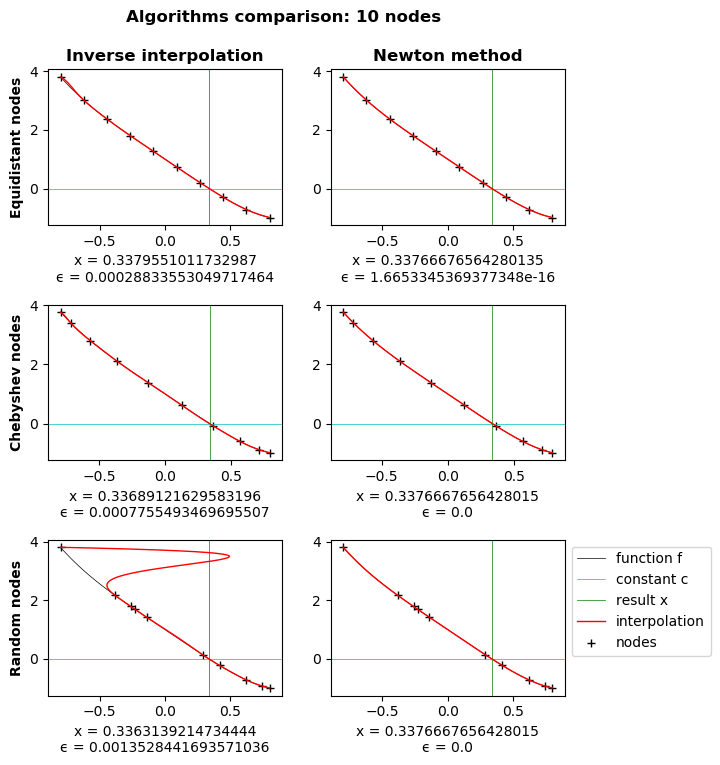

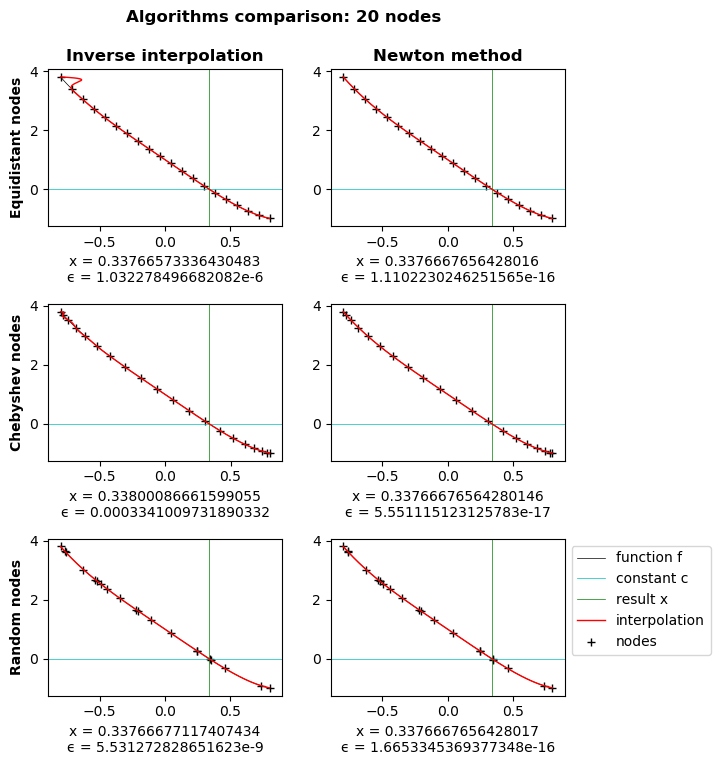

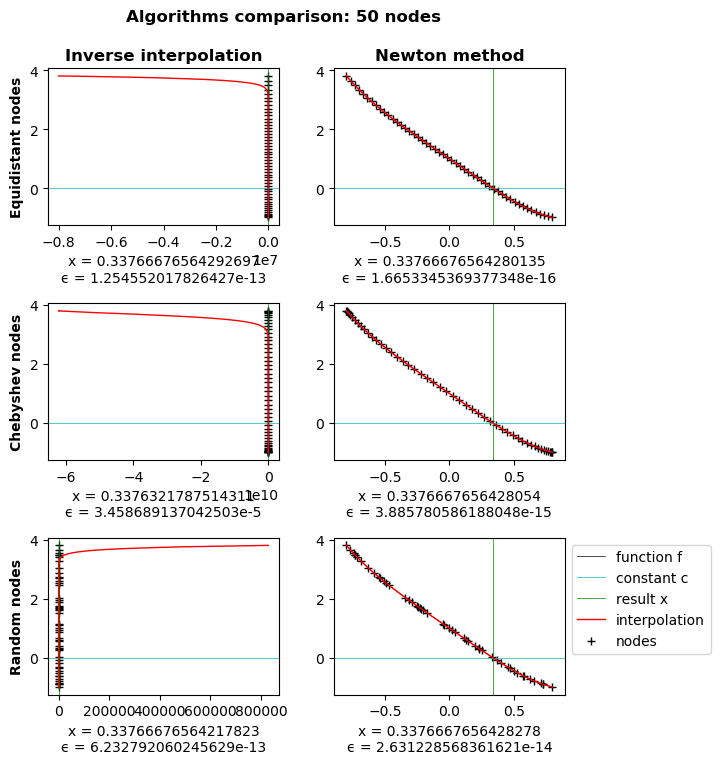

In [16]:
f(x) = x^4 - 3*x + 1
plot_results(f, 0, -0.8, 0.8, 0.3376667656428015332087944, [10, 20, 50]);

### 2)
$$ln(x^2 + 4) = ln(4,2) \qquad (x\in[0,5])$$

$$x=\sqrt{0.2}$$

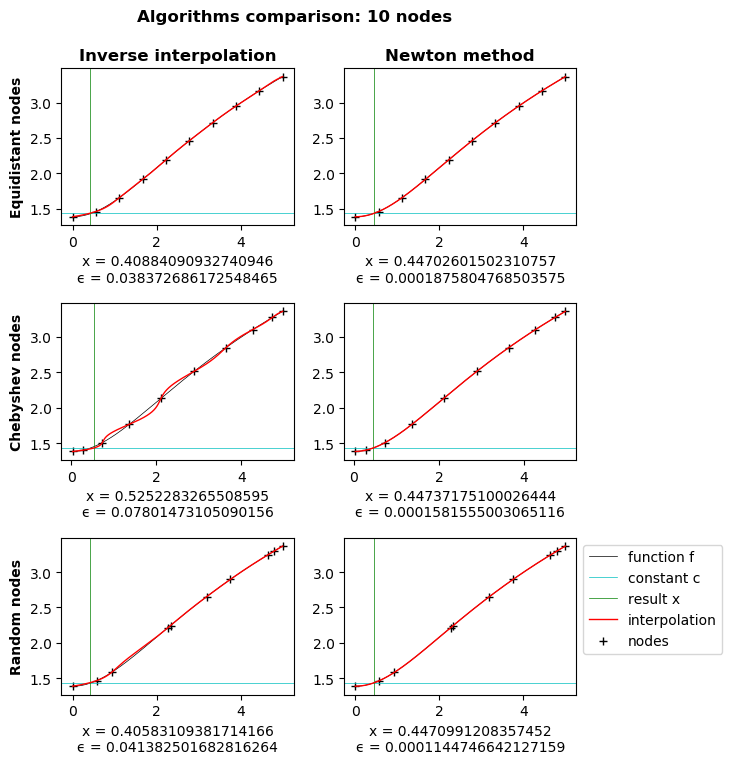

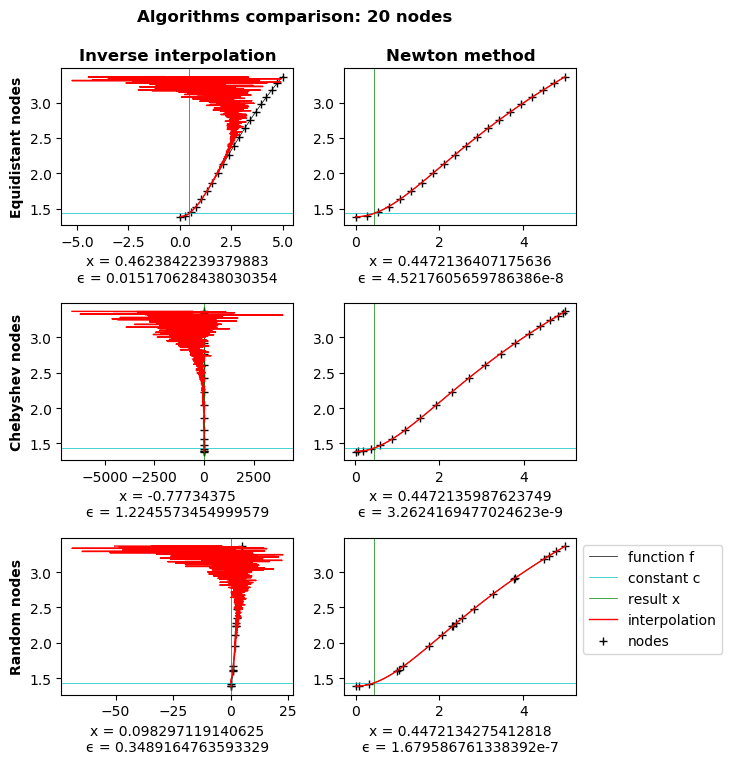

In [18]:
f(x) = log(x^2 + 4)
plot_results(f, log(4.2), 0, 5, sqrt(0.2), [10, 20]);

### 3)
$$\frac{1}{1+25x^2}=0.5 \qquad (x\in[0, 1])$$

$$x=0.2$$

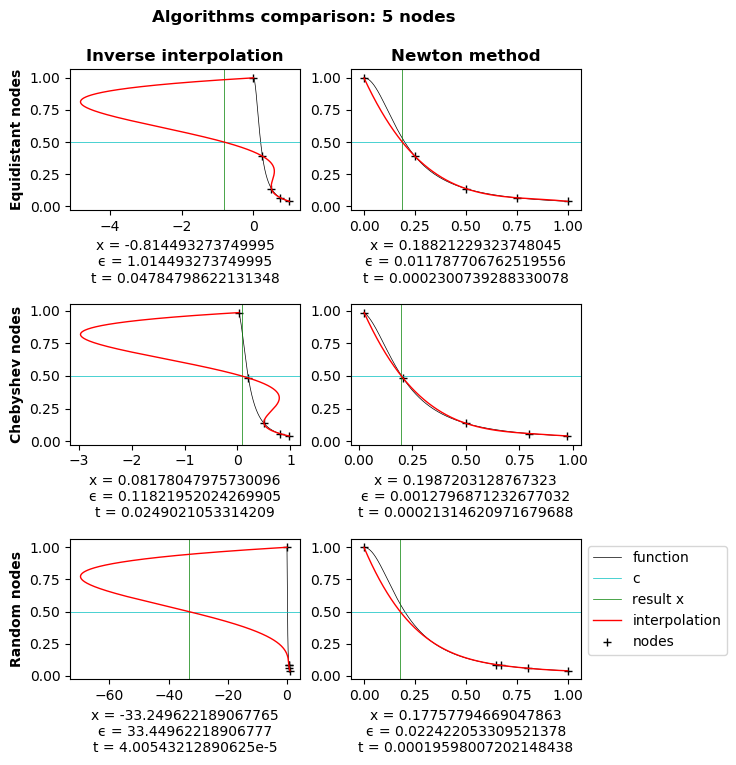

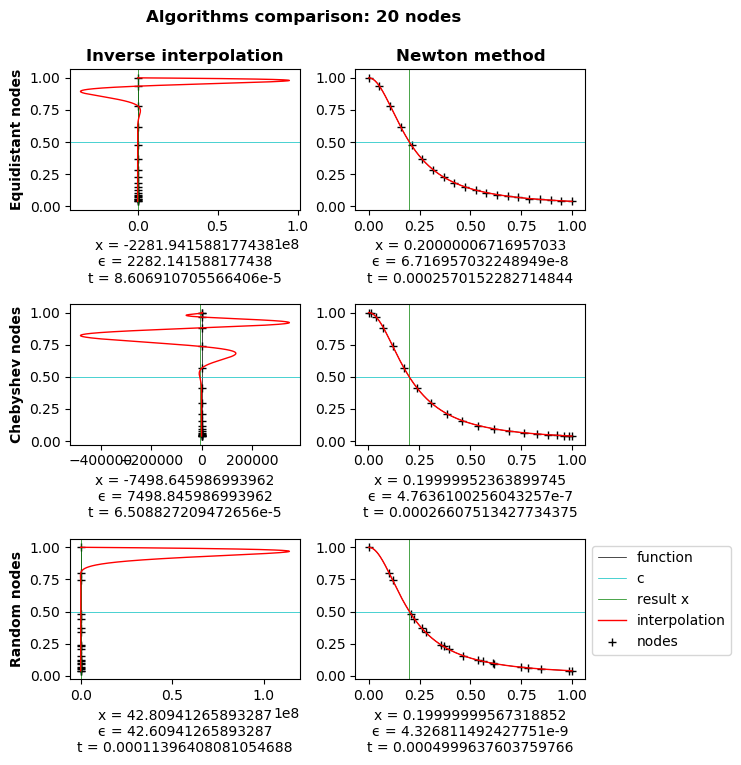

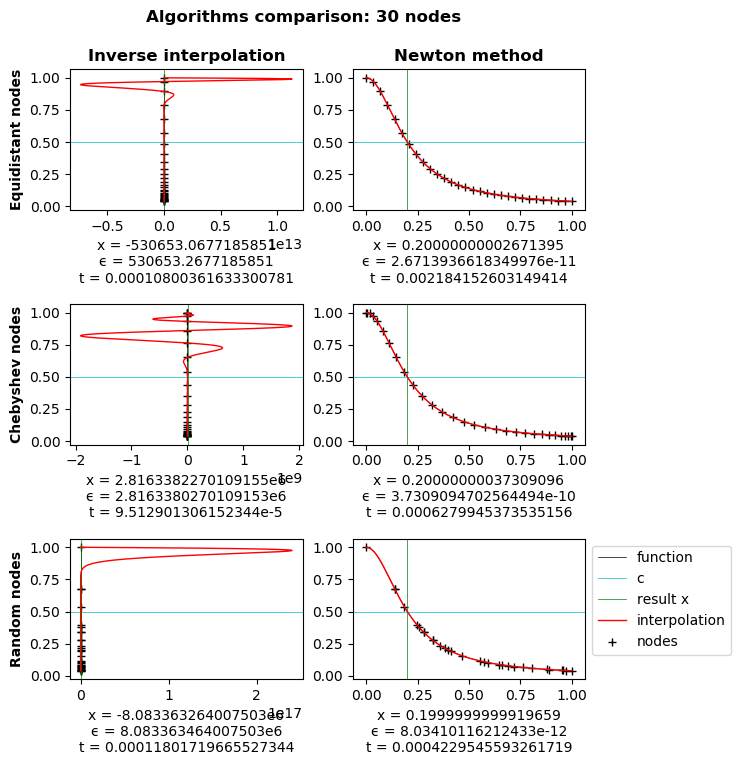

In [182]:
f(x) = 1 / (1 + 25*x^2)
plot_results(f, 0.5, 0, 1, 0.2, [5, 20, 30]);